## Notebook using the permuted model for the saliency maps

In [2]:
from torch.utils import data
import torchvision
from models.grad_cam import CNN_grad_cam, display_datasets_heatmap
import torch
import torchvision.transforms as transforms


In [3]:
model_permuted = torch.load('models/model_permuted.pth')

In [4]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)
trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])

In [5]:
data_for_saliency_maps =  torchvision.datasets.ImageFolder('archive/chest_xray/plot_grad_cam', transform=trans0)
dataloader_grad_cam = data.DataLoader(data_for_saliency_maps, shuffle=False, batch_size=1)

In [6]:
dataloader_grad_cam.dataset[1][1]

0

## Grad cam

In [7]:
model_permuted_grad_cam = CNN_grad_cam(model_permuted)

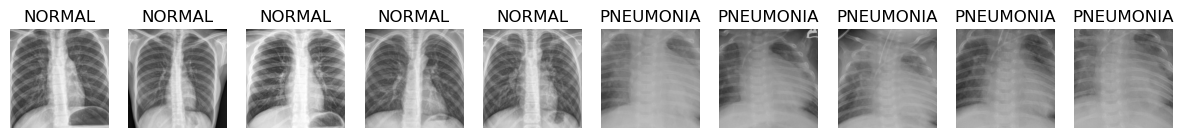

In [8]:
from matplotlib import pyplot as plt

import numpy as np
dataset_0 = torchvision.datasets.ImageFolder("archive/chest_xray/plot_grad_cam", transform=trans0)

def display_dataset(dataset, n=10,classes=('NORMAL','PNEUMONIA')):
    fig,ax = plt.subplots(1,n,figsize=(15,3))
    mn = min([dataset[i][0].min() for i in range(n)])
    mx = max([dataset[i][0].max() for i in range(n)])
    for i in range(n):
        ax[i].imshow(np.transpose((dataset[i][0]-mn)/(mx-mn),(1,2,0)))
        ax[i].axis('off')
        if classes:
            ax[i].set_title(classes[dataset[i][1]])

display_dataset(dataset_0)

-3.6833327
1 0
1 0
1 0
0 0
1 0
1 1
1 1
1 1
0 1
0 1


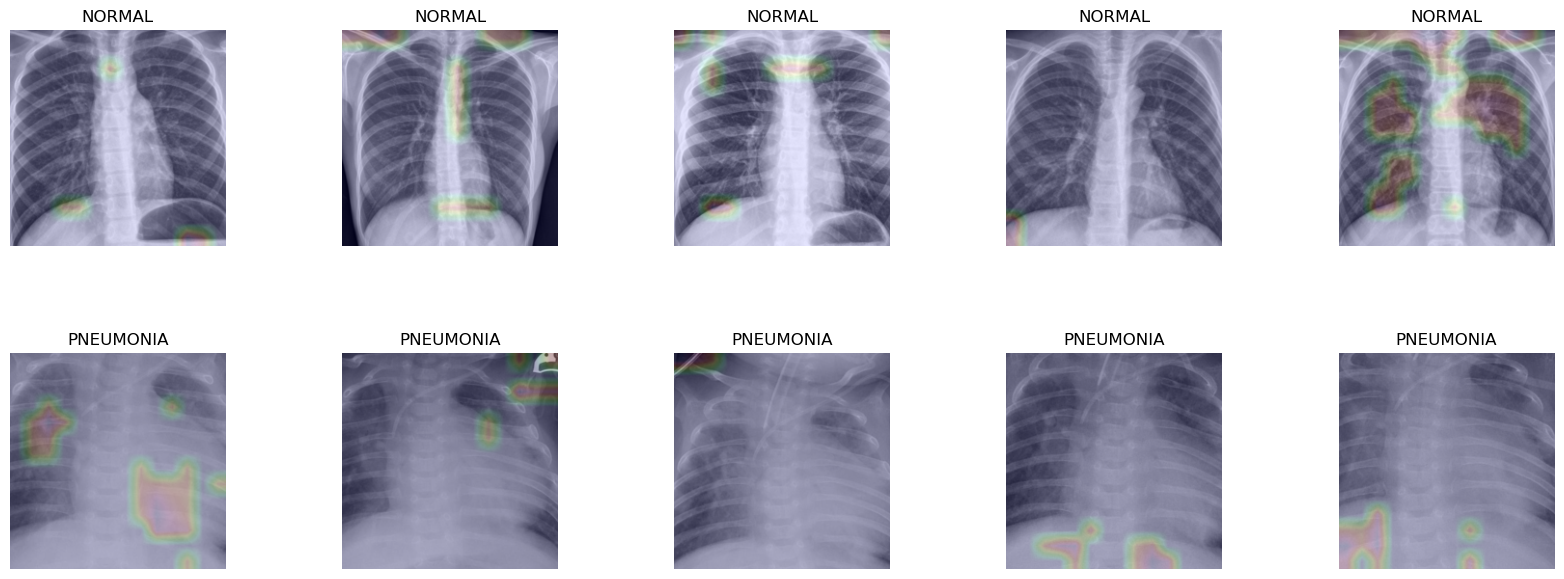

In [9]:
display_datasets_heatmap(model_permuted_grad_cam, dataloader_grad_cam, n=10)

## Integrated Gradients